In [1]:
import numpy as np

In [34]:
import matplotlib.pyplot as plt

In [18]:
def gen_data(dimension, data_count):
    """Generates data matrices x, y."""
    # generate x and y
    x = np.random.normal(scale=1/data_count, size=(data_count, dimension))
    y = np.random.normal(size=(data_count))
    return x, y

def w_star(x, y, l):
    """Computes the closed form ridgre regression optimum w_star."""
    # construct w_\star
    I = np.eye(x.shape[1])
    x_t = np.transpose(x)
    h = np.matmul(x_t, x) + l * I
    h = np.matmul(np.linalg.inv(h), np.transpose(x))
    return np.matmul(h, y)

def norm(v):
    """Convenience function to compute norm of vector."""
    if len(v.shape) > 1:
        raise ValueError("Should be 1D vector.")
    return np.sum( v ** 2)

def loss(x, y, l, w):
    """Computes the loss function (called $\Phi_H$ in the problem.)."""
    n = x.shape[0]
    loss_unscaled = norm(y - np.matmul(x, w)) + l * norm(w)
    return (1/2 /n) * loss_unscaled

In [50]:
d = 1000

alpha = np.linspace(0,2, 20)[1:] # drop `0`
n = alpha * d
n = n.astype(int)
l = np.array([.001, .05, .5])


In [51]:
# data matrices.
w_norm = np.zeros((n.shape[0], l.shape[0]))
phi = np.zeros_like(w_norm)

for i, n_ in enumerate(n):
    for j, l_ in enumerate(l):
        # generate data.
        x, y = gen_data(d, n_)
        
        # calculate w and loss.
        w = w_star(x, y, l_)
        p = loss(x, y, l_, w)
        
        # Save data.
        w_norm[i, j] = norm(w)
        phi[i,j] = p


In [52]:
w_norm = w_norm / d

Text(0.5, 0.98, '$||w_\\star||^2 / d$')

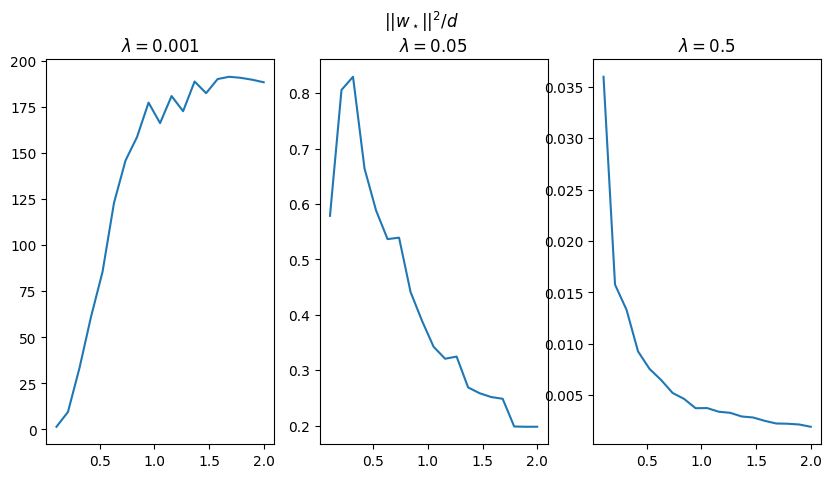

In [58]:
# Plot
fig, ax = plt.subplots(1,3, figsize=(10 ,5))

for j, l_ in enumerate(l):
    ax[j].plot(alpha, w_norm[:, j], label=l_)
    ax[j].set_title(f"$\lambda = {l_}$")

fig.suptitle("$||w_\star||^2 / d$")

Text(0.5, 0.98, '$\\Phi_H$')

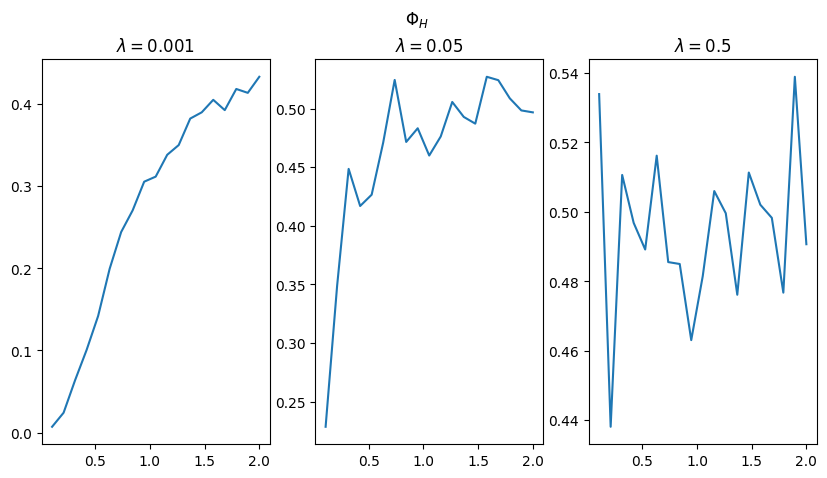

In [59]:
# Plot
fig, ax = plt.subplots(1,3, figsize=(10 ,5))

for j, l_ in enumerate(l):
    ax[j].plot(alpha, phi[:, j], label=l_)
    ax[j].set_title(f"$\lambda = {l_}$")

fig.suptitle("$\Phi_H$")